In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [234]:
path_to_file = 'C:\Users\Administrator\Documents\Python Scripts\examplepark.csv'
data = pd.read_csv(path_to_file)

In [235]:
#data.head(10)

In [236]:
#data.info()

In [237]:
#data.describe()

## Don't forget to anonymise this

In [238]:
#type(data['Time'][0])

In [239]:
#type(data['Date'][0])

In [240]:
data['Time'] = ((pd.to_numeric(data['Time'].str.slice(0,2)))*60)+(pd.to_numeric(data['Time'].str.slice(3,5)))+((pd.to_numeric(data['Time'].str.slice(6,8)))/60)

In [241]:
data['Date'] = pd.to_datetime(data['Date'],errors='coerce', format='%d-%m-%Y')

In [242]:
data['Age_Cat'] = pd.to_numeric(data['Age_Cat'].str.slice(2,4),errors='coerce', downcast='signed')

In [243]:
#type(data['Time'][0])

In [244]:
#type(data['Date'][0])

In [245]:
#data.head(10)

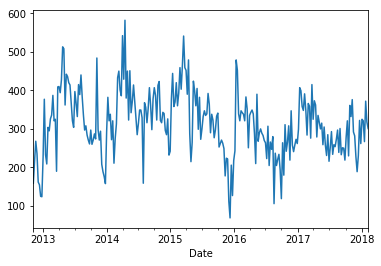

In [246]:
data.groupby('Date').count()['Pos'].plot.line() # The Position col is used because even Unknown athletes get a position, but not a time.
#So counting times results in a smaller athlete count. That's also why we don't drop the unknown athletes

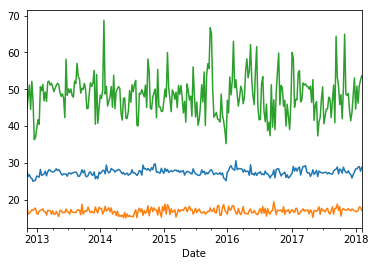

In [247]:
data.groupby('Date').mean()['Time'].plot.line()
data.groupby('Date').min()['Time'].plot.line()
data.groupby('Date').max()['Time'].plot.line()

In [248]:
#data.groupby('Date').mean()['Time'].plot.line()

In [249]:
#data.groupby('Date').min()['Time'].plot.line()

In [250]:
#data.groupby('Date').max()['Time'].plot.line()

In [251]:
#data['Time'].min()

In [252]:
#data['Time'].max()

In [253]:
#data['Time'].mean()

In [254]:
#data.groupby('Age_Cat').max()['Time'].plot.line()

In [255]:
#data.groupby('Age_Cat').min()['Time'].plot.line()

In [256]:
#data.groupby('Age_Cat').mean()['Time'].plot.line()

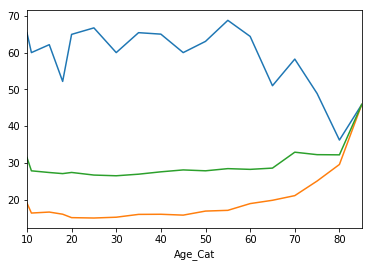

In [257]:
data.groupby('Age_Cat').max()['Time'].plot.line()
data.groupby('Age_Cat').min()['Time'].plot.line()
data.groupby('Age_Cat').mean()['Time'].plot.line()

In [258]:
# Do a plot of males and females, min,max and mean time vs age. 
#Then do a count of each category as a histogram.
# maybe could use < n to select between gender
# or use two groupbys
# or pivot table

In [259]:
#data.groupby('Date').describe().head()

In [260]:
#list(data.groupby('Age_Cat'))[0]

In [261]:
#data.groupby('Age_Cat').describe().head(20)

In [262]:
#data.groupby('Age_Cat').head()

In [263]:
#data.head()

In [264]:
#data.groupby(['Gender','Age_Cat']).mean()['Time'].plot.line()

In [265]:
#data.groupby(['Gender','Age_Cat']).mean().plot.line()

In [266]:
data.groupby(['Gender','Age_Cat']).describe().head()

Gen_Pos                                                        \
                 count       mean        std  min   25%   50%     75%    max   
Gender Age_Cat                                                                 
F      10.0      468.0  89.675214  49.232887  1.0  54.0  88.5  123.00  240.0   
       11.0     1069.0  76.621141  52.085959  1.0  32.0  72.0  114.00  281.0   
       15.0      900.0  79.568889  54.537378  1.0  29.0  79.5  120.00  263.0   
       18.0      352.0  56.090909  47.558064  1.0  17.0  44.0   81.00  273.0   
       20.0     1006.0  71.701789  55.206699  1.0  27.0  59.0  105.75  282.0   

                   Pos              ...         Time            Total_Runs  \
                 count        mean  ...          75%        max      count   
Gender Age_Cat                      ...                                      
F      10.0      468.0  249.615385  ...    36.566667  65.166667      468.0   
       11.0     1069.0  222.203929  ...    35.016667  59.983333     1069.0   
       15.0      900.0  225.402222  ...    34.862500  62.133333      900.0   
       18.0      352.0  181.661932  ...    30.716667  52.150000      352.0   
       20.0     1006.0  210.628231  ...    32.762500  64.933333     1006.0   

                                                                   
                     mean        std  min  25%   50%   75%    max  
Gender Age_Cat                                                     
F      10.0     13.273504  19.209818  1.0  2.0   6.0  14.0  122.0  
       11.0     21.328344  22.473908  1.0  4.0  14.0  33.0  199.0  
       15.0     21.668889  29.245867  1.0  3.0  11.0  31.0  180.0  
       18.0     54.056818  48.875936  1.0  7.0  31.0  80.0  135.0  
       20.0     30.264414  37.544212  1.0  3.0  12.0  42.0  135.0  

[5 rows x 40 columns]

In [267]:
df1 = data.groupby(['Gender','Age_Cat']).mean()['Time']

In [268]:
df1.head()

Gender  Age_Cat
F       10.0       32.879202
        11.0       31.058809
        15.0       31.332648
        18.0       28.495502
        20.0       30.145129
Name: Time, dtype: float64

In [269]:
df1.unstack()

Age_Cat,10.0,11.0,15.0,18.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0,55.0,60.0,65.0,70.0,75.0,80.0,85.0
Gender,,,,,,,,,,,,,,,,,,
F,32.879202,31.058809,31.332648,28.495502,30.145129,29.715819,29.722769,29.445638,30.441809,30.676282,31.072121,32.690354,32.255015,31.679966,47.916667,43.033333,NaN,45.883333
M,30.426167,25.713185,23.841884,24.954148,23.083596,23.203273,23.440808,23.989655,24.031783,25.303550,25.572733,25.796064,26.072968,27.488043,32.162121,31.476488,32.199167,NaN


In [270]:
df1.unstack(level=0)

Gender,F,M
Age_Cat,,
10.0,32.879202,30.426167
11.0,31.058809,25.713185
15.0,31.332648,23.841884
18.0,28.495502,24.954148
20.0,30.145129,23.083596
25.0,29.715819,23.203273
30.0,29.722769,23.440808
35.0,29.445638,23.989655
40.0,30.441809,24.031783


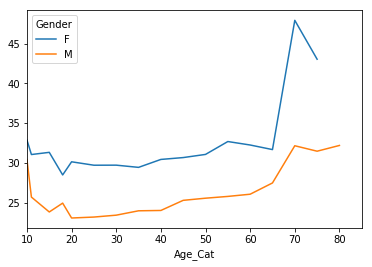

In [271]:
df1.unstack(level=0).plot.line() ## It would be nice to put the std deviation
# around these pts.

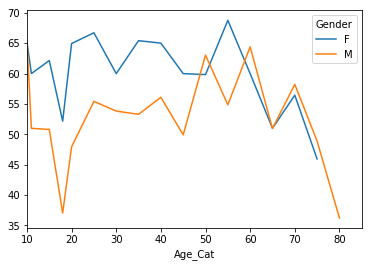

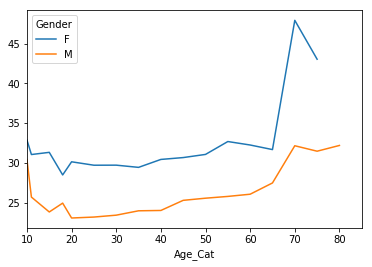

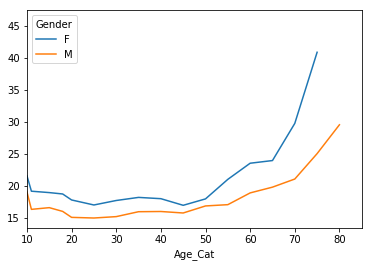

In [272]:
data.groupby(['Gender','Age_Cat']).max()['Time'].unstack(level=0).plot.line()
data.groupby(['Gender','Age_Cat']).mean()['Time'].unstack(level=0).plot.line()
data.groupby(['Gender','Age_Cat']).min()['Time'].unstack(level=0).plot.line()

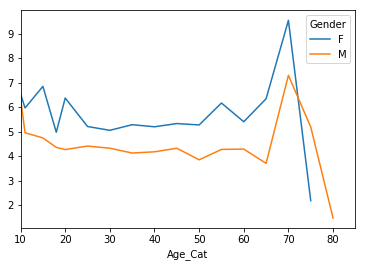

In [273]:
data.groupby(['Gender','Age_Cat']).std()['Time'].unstack(level=0).plot.line()

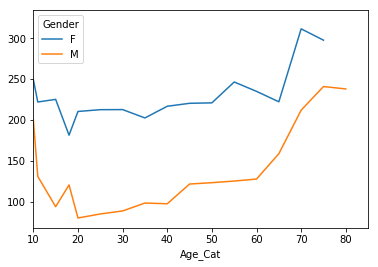

In [274]:
data.groupby(['Gender','Age_Cat']).mean()['Pos'].unstack(level=0).plot.line()

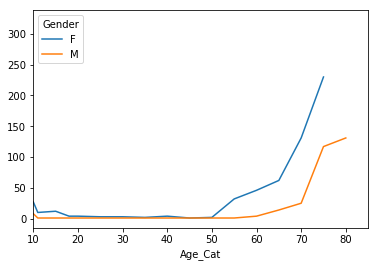

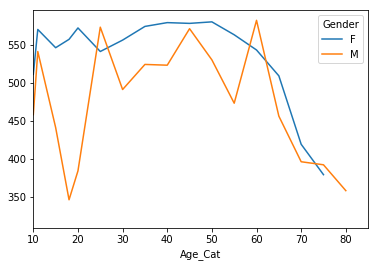

In [275]:
data.groupby(['Gender','Age_Cat']).min()['Pos'].unstack(level=0).plot.line()
data.groupby(['Gender','Age_Cat']).max()['Pos'].unstack(level=0).plot.line()

In [276]:
df1 = data.groupby(['Gender','Age_Cat']).mean()['Time'].unstack(level=0)

In [277]:
#df_fem = df.iloc[:17]

In [278]:
#df_fem.head(20)

In [279]:
#df_male = df.iloc[17:]

In [280]:
#df_male.head(20)

In [321]:
df = data[:500]

In [322]:
df = df.drop('Club',1)

In [323]:
df = df.dropna()

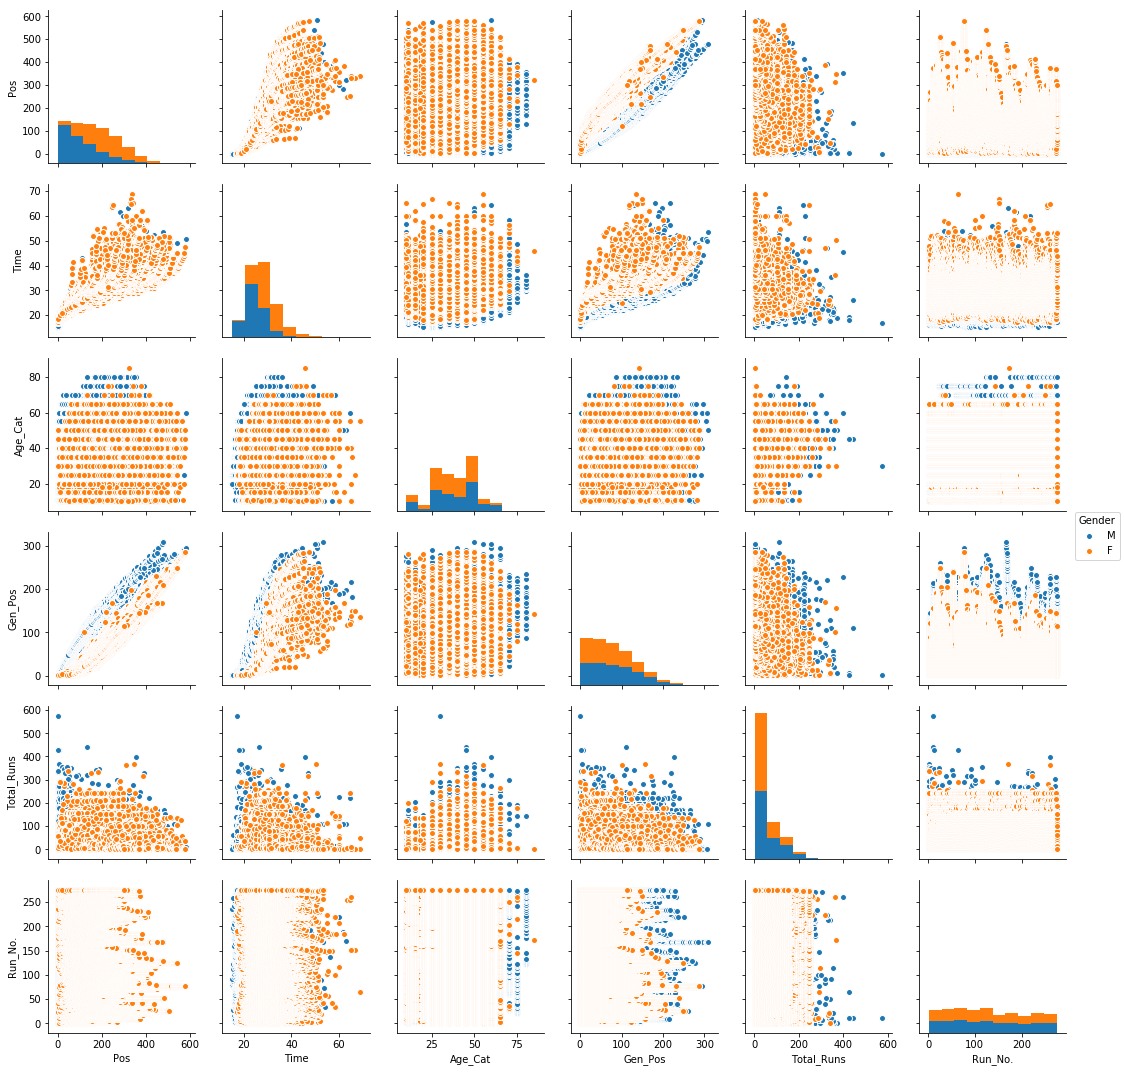

In [325]:
sns.pairplot(data, hue="Gender")

In [ ]:
## Should be able to tell from Gen Pos and Pos and Time what the gender of the runner is.
## Each thread is a different race

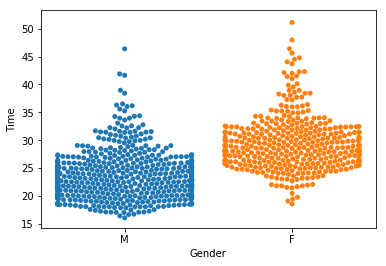

In [115]:
sns.swarmplot(x="Gender", y="Time", data=df)

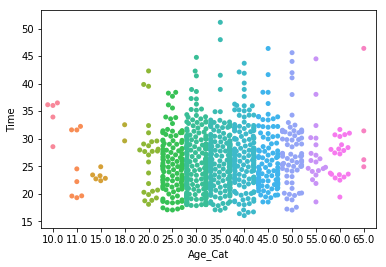

In [116]:
sns.swarmplot(x="Age_Cat", y="Time", data=df)

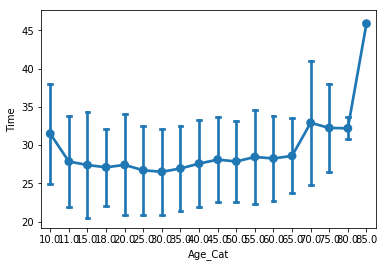

In [117]:
sns.pointplot(x="Age_Cat", y="Time", data=data, capsize=.2,ci='sd')

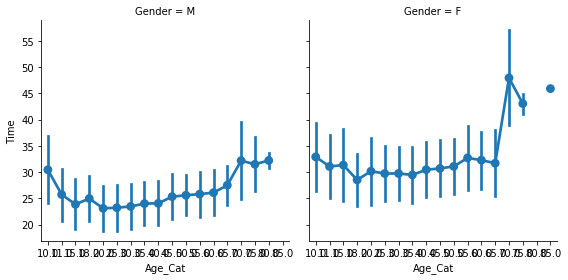

In [122]:
sns.factorplot("Age_Cat", "Time", col="Gender",
               data=data, kind="point", ci='sd')

In [323]:
#data.set_index(['Gender','Age_Cat'],inplace=True)

In [375]:
#data.sort_index(inplace=True)

In [376]:
#data.loc[('F',35.0)]